#### Import

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.max_rows", None)  # Î™®Îì† Ìñâ Ï∂úÎ†•
pd.set_option("display.max_columns", None)  # Î™®Îì† Ïó¥ Ï∂úÎ†•
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from functions import (load_parameters, load_generation_data, load_price_data, generate_randomized_generation,
generate_rt_scenarios, plot_generation_data, plot_randomized_generation, plot_scenarios_for_generator, plot_rt_scenarios, plot_summary)
from utils import optimize_hol, optimize_without, optimize_without_loop, compute_price_functions, transform_step, compare_allstep, compare_onestep, compare_onestep_detailed, optimize_individually, optimize_individually_forall

generation_data, I, T = load_generation_data(date_filter="2022-07-18")
S, R, P_RT, K, K0, M1, M2 = load_parameters(I, T, generation_data)
P_DA, P_PN = load_price_data()

‚úÖ Ï¥ù 5Í∞ú ÌååÏùºÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§: 1201.csv, 137.csv, 401.csv, 524.csv, 89.csv
üìä Îç∞Ïù¥ÌÑ∞ Shape: I=5, T=24, S=20
‚úÖ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï¥àÍ∏∞Ìôî ÏôÑÎ£å: S=20, Randomness='high', M1=757.00, M2=2111.00


#### Individual Participation

In [2]:
x_ind, yp_ind, ym_ind, z_ind, zc_ind, zd_ind, obj_ind = optimize_individually_forall(R, K, K0, P_DA, P_RT, P_PN, I, T, S, M1)

Optimizing individually for each target_i:   0%|          | 0/5 [00:00<?, ?it/s]

Set parameter Username
Set parameter LicenseID to value 2611964
Academic license - for non-commercial use only - expires 2026-01-20
Set parameter MIPGap to value 1e-07


Optimizing individually for each target_i:  20%|‚ñà‚ñà        | 1/5 [00:00<00:00,  6.47it/s]

Optimal solution found for target_i=0! Objective value: 212864.3137148907
Set parameter MIPGap to value 1e-07


Optimizing individually for each target_i:  40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [00:00<00:00,  7.57it/s]

Optimal solution found for target_i=1! Objective value: 341599.1289183394
Set parameter MIPGap to value 1e-07


Optimizing individually for each target_i:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 3/5 [00:00<00:00,  7.43it/s]

Optimal solution found for target_i=2! Objective value: 385838.8922685327
Set parameter MIPGap to value 1e-07
Optimal solution found for target_i=3! Objective value: 473757.86246924783
Set parameter MIPGap to value 1e-07


Optimizing individually for each target_i: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:00<00:00,  8.25it/s]

Optimal solution found for target_i=4! Objective value: 164384.51523558467


#### Holistic Optimization

In [3]:
x_hol, a_hol, yp_hol, ym_hol, z_hol, zc_hol, zd_hol, ep_hol, bp_hol, em_hol, bm_hol, d_hol, dp_hol, dm_hol, obj_hol = optimize_hol(R, K, K0, P_DA, P_RT, P_PN, I, T, S, M1, M2)

Set parameter MIPGap to value 1e-07
Optimal solution found! Objective value: 1715933.4721934162


#### Holistic Optimization without target_i

In [4]:
x_without, ep_without, em_without, yp_without, ym_without, d_without, dp_without, dm_without, i_map_without = optimize_without_loop(R, K, K0, P_DA, P_RT, P_PN, I, T, S)

Solving settlement model for each target DER:   0%|          | 0/5 [00:00<?, ?it/s]

Set parameter MIPGap to value 1e-07


Solving settlement model for each target DER:  20%|‚ñà‚ñà        | 1/5 [00:06<00:26,  6.53s/it]

Set parameter MIPGap to value 1e-07


Solving settlement model for each target DER:  40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [00:11<00:17,  5.90s/it]

Set parameter MIPGap to value 1e-07


Solving settlement model for each target DER:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 3/5 [00:15<00:09,  4.73s/it]

Set parameter MIPGap to value 1e-07


Solving settlement model for each target DER:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 4/5 [00:21<00:05,  5.31s/it]

Set parameter MIPGap to value 1e-07


Solving settlement model for each target DER: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:29<00:00,  5.83s/it]


#### Price Functions

In [5]:
rdc, rsc, rho_plus, rho_minus, total_demand_without, total_supply_without = compute_price_functions(
    yp_without, ym_without, dp_without, dm_without, i_map_without, P_RT, P_PN, T, S, I
)

In [6]:
target_i, t, s = 1, 16, 7

ap, bp = rho_plus[target_i, t, s, :]
am, bm = rho_minus[target_i, t, s, :]

print(f"œÅ‚Å∫(d) = {ap:.2f} + {bp:.2f}¬∑d")
print(f"œÅ‚Åª(d) = {am:.2f} + {bm:.2f}¬∑d")

œÅ‚Å∫(d) = 211.96 + -0.33¬∑d
œÅ‚Åª(d) = 211.96 + 0.33¬∑d


#### Transform Stepwise

In [7]:
RP, RM, BP, BM = transform_step(rho_plus, rho_minus, total_demand_without, total_supply_without, step_width_multiplier=1)

In [8]:
print(yp_without[target_i][:, t, s])
print(BP[target_i, t, s])
print(RP[target_i, t, s])

print(ym_without[target_i][:, t, s])
print(BM[target_i, t, s])
print(RM[target_i, t, s])

[  0.  95. 112.   0.]
207
[[  0.         211.96130103]
 [  0.5        211.79457302]
 [  1.5        211.46111699]
 [  2.5        211.12766096]
 [  3.5        210.79420493]
 [  4.5        210.4607489 ]
 [  5.5        210.12729288]
 [  6.5        209.79383685]
 [  7.5        209.46038082]
 [  8.5        209.12692479]
 [  9.5        208.79346876]
 [ 10.5        208.46001273]
 [ 11.5        208.1265567 ]
 [ 12.5        207.79310068]
 [ 13.5        207.45964465]
 [ 14.5        207.12618862]
 [ 15.5        206.79273259]
 [ 16.5        206.45927656]
 [ 17.5        206.12582053]
 [ 18.5        205.7923645 ]
 [ 19.5        205.45890847]
 [ 20.5        205.12545245]
 [ 21.5        204.79199642]
 [ 22.5        204.45854039]
 [ 23.5        204.12508436]
 [ 24.5        203.79162833]
 [ 25.5        203.4581723 ]
 [ 26.5        203.12471627]
 [ 27.5        202.79126025]
 [ 28.5        202.45780422]
 [ 29.5        202.12434819]
 [ 30.5        201.79089216]
 [ 31.5        201.45743613]
 [ 32.5        20

#### Stepwise Model

In [9]:
x_part, yp_part, ym_part, z_part, zc_part, zd_part, dp_part, dm_part, up_part, um_part, wp_part, wm_part, obj_part = [], [], [], [], [], [], [], [], [], [], [], [], []

for target_i in tqdm(range(I), desc="Optimizing Stepwise for each target_i"):
    model = gp.Model("Stepwise_Internal_Optimization_{target_i}")
    model.setParam("OutputFlag", 0)
    model.setParam("MIPGap", 1e-7)

    x = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="x")
    yp = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="y_plus")
    ym = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="y_minus")
    z = model.addVars(T + 1, S, vtype=GRB.CONTINUOUS, lb=0, name="z")
    zc = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="z_charge")
    zd = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="z_discharge")
    dp = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="d_plus")
    dm = model.addVars(T, S, vtype=GRB.CONTINUOUS, lb=0, name="d_minus")

    p1  = model.addVars(T, S, vtype=GRB.BINARY, name="p1")
    p2  = model.addVars(T, S, vtype=GRB.BINARY, name="p2")
    p3  = model.addVars(T, S, vtype=GRB.BINARY, name="p3")
    p4  = model.addVars(T, S, vtype=GRB.BINARY, name="p4")
    
    wp, up = {}, {}
    wm, um = {}, {}
    for t, s in product(range(T), range(S)):
        Bp = BP[target_i, t, s]
        Bm = BM[target_i, t, s]
        for b in range(Bp):
            wp[t, s, b] = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"w_plus_{t}_{s}_{b}")
            up[t, s, b] = model.addVar(vtype=GRB.BINARY, name=f"u_plus_{t}_{s}_{b}")
        for b in range(Bm):
            wm[t, s, b] = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"w_minus_{t}_{s}_{b}")
            um[t, s, b] = model.addVar(vtype=GRB.BINARY, name=f"u_minus_{t}_{s}_{b}")

    model.update()

    obj = gp.quicksum(P_DA[t] * x[t] for t in range(T)) \
        + gp.quicksum((1/S) * (P_RT[t, s] * yp[t, s] - P_PN[t] * ym[t, s]) for t in range(T) for s in range(S)) \
        + gp.quicksum((1/S) * (
            gp.quicksum(
                RP[target_i, t, s][b][1] * (wp[t, s, b] + up[t, s, b] * RP[target_i, t, s][b][0])
                for b in range(BP[target_i, t, s])
            ) -
            gp.quicksum(
                RM[target_i, t, s][b][1] * (wm[t, s, b] + um[t, s, b] * RM[target_i, t, s][b][0])
                for b in range(BM[target_i, t, s])
            )
        ) for t in range(T) for s in range(S))

    model.setObjective(obj, GRB.MAXIMIZE)

    for t, s in product(range(T), range(S)):
        model.addConstr(R[target_i, t, s] - x[t] == yp[t, s] - ym[t, s] + zc[t, s] - zd[t, s] + dp[t, s] - dm[t, s])
        model.addConstr(yp[t, s] + dp[t, s] + zc[t, s] <= R[target_i, t, s] + zd[t, s])
        model.addConstr(z[t + 1, s] == z[t, s] + zc[t, s] - zd[t, s])
        model.addConstr(zd[t, s] <= z[t, s])
        model.addConstr(zc[t, s] <= K[target_i] - z[t, s])
        model.addConstr(z[t, s] <= K[target_i])
        model.addConstr(z[t, s] >= 0)
        model.addConstr(yp[t, s] <= M1 * p1[t, s])
        model.addConstr(ym[t, s] <= M1 * (1 - p1[t, s]))
        model.addConstr(ym[t, s] <= M1 * p2[t, s])
        model.addConstr(zc[t, s] <= M1 * (1 - p2[t, s]))
        model.addConstr(zc[t, s] <= M1 * p3[t, s])
        model.addConstr(zd[t, s] <= M1 * (1 - p3[t, s]))
        model.addConstr(dp[t, s] <= M1 * p4[t, s])
        model.addConstr(dm[t, s] <= M1 * (1 - p4[t, s]))

    for s in range(S):
        model.addConstr(z[0, s] == K0[target_i])

    for t, s in product(range(T), range(S)):
        model.addConstr(dp[t, s] == gp.quicksum(wp[t, s, bp] + up[t, s, bp] * RP[target_i, t, s][bp][0]
                                                for bp in range(BP[target_i, t, s])))
        model.addConstr(dm[t, s] == gp.quicksum(wm[t, s, bm] + um[t, s, bm] * RM[target_i, t, s][bm][0]
                                                for bm in range(BM[target_i, t, s])))

        model.addConstr(gp.quicksum(up[t, s, bp] for bp in range(BP[target_i, t, s])) <= 1)
        model.addConstr(gp.quicksum(um[t, s, bm] for bm in range(BM[target_i, t, s])) <= 1)
            
        for bp in range(BP[target_i, t, s]):
            if bp < BP[target_i, t, s] - 1:
                WIDTH = RP[target_i, t, s][bp + 1][0] - RP[target_i, t, s][bp][0]
            else:
                WIDTH = max(1e-6, total_supply_without[target_i, t, s] - RP[target_i, t, s][bp][0])
            model.addConstr(wp[t, s, bp] <= up[t, s, bp] * WIDTH)

        for bm in range(BM[target_i, t, s]):
            if bm < BM[target_i, t, s] - 1:
                WIDTH = RM[target_i, t, s][bm + 1][0] - RM[target_i, t, s][bm][0]
            else:
                WIDTH = max(1e-6, total_demand_without[target_i, t, s] - RM[target_i, t, s][bm][0])
            model.addConstr(wm[t, s, bm] <= um[t, s, bm] * WIDTH)

    model.optimize()

    x_part.append(np.array([x[t].X for t in range(T)]))
    yp_part.append(np.array([[yp[t, s].X for s in range(S)] for t in range(T)]))
    ym_part.append(np.array([[ym[t, s].X for s in range(S)] for t in range(T)]))
    z_part.append(np.array([[z[t, s].X for s in range(S)] for t in range(T + 1)]))
    zc_part.append(np.array([[zc[t, s].X for s in range(S)] for t in range(T)]))
    zd_part.append(np.array([[zd[t, s].X for s in range(S)] for t in range(T)]))
    dp_part.append(np.array([[dp[t, s].X for s in range(S)] for t in range(T)]))
    dm_part.append(np.array([[dm[t, s].X for s in range(S)] for t in range(T)]))
    obj_part.append(model.objVal)
    
    MAX_BP = np.max(BP[target_i])
    MAX_BM = np.max(BM[target_i])

    up_array = np.full((T, S, MAX_BP), np.nan)
    um_array = np.full((T, S, MAX_BM), np.nan)
    wp_array = np.full((T, S, MAX_BP), np.nan)
    wm_array = np.full((T, S, MAX_BM), np.nan)

    for t, s in product(range(T), range(S)):
        for bp in range(BP[target_i, t, s]):
            up_array[t, s, bp] = up[t, s, bp].X
            wp_array[t, s, bp] = wp[t, s, bp].X
        for bm in range(BM[target_i, t, s]):
            um_array[t, s, bm] = um[t, s, bm].X
            wm_array[t, s, bm] = wm[t, s, bm].X

    up_part.append(up_array)
    um_part.append(um_array)
    wp_part.append(wp_array)
    wm_part.append(wm_array)

Optimizing Stepwise for each target_i: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:28<00:00,  5.71s/it]


In [10]:
RPC = np.full((I, T, S), np.nan)
RMC = np.full((I, T, S), np.nan)

for target_i in range(I):
    for s, t in product(range(S), range(T)):
        for bp in range(BP[target_i, t, s]):
            if round(up_part[target_i][t, s, bp]) == 1:
                RPC[target_i, t, s] = RP[target_i, t, s][bp][1]
                print(f"[i={target_i}, t={t}, s={s}] bp={bp}, price={RP[target_i, t, s][bp][1]}, quantity={dp_part[target_i][t, s]} (D_min={RP[target_i, t, s][bp][0]} + w={wp_part[target_i][t, s, bp]})")
                break

        for bm in range(BM[target_i, t, s]):
            if round(um_part[target_i][t, s, bm]) == 1:
                RMC[target_i, t, s] = RM[target_i, t, s][bm][1]
                # print(f"[i={target_i}, t={t}, s={s}] bm={bm}, price={RM[target_i, t, s][bm][1]}, quantity={dm_part[target_i][t, s]} (D_min={RM[target_i, t, s][bm][0]} + w={wm_part[target_i][t, s, bm]})")
                break

[i=0, t=0, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=1, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=2, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=3, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=4, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=5, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=6, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=7, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=8, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=9, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=10, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=11, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0.0)
[i=0, t=12, s=0] bp=0, price=-10000000000.0, quantity=0.0 (D_min=0.0 + w=0

#### Results

In [11]:
target_i = 2

header = (
    f"{'s':>2} {'t':>2} | "
    f"{'R':>8} {'x':>8} {'y+':>8} {'y-':>8} "
    f"{'d+':>8} {'d-':>8} {'zc':>8} {'zd':>8} {'z':>8}\n"
    + "-" * 90
)
print(header)

for s, t in product(range(0,1), range(20,21)):
    print(
        f"{s:>2} {t:>2} | "
        f"{R[target_i, t, s]:>8.2f} {x_part[target_i][t]:>8.2f} {yp_part[target_i][t, s]:>8.2f} {ym_part[target_i][t, s]:>8.2f} "
        f"{dp_part[target_i][t, s]:>8.2f} {dm_part[target_i][t, s]:>8.2f} {zc_part[target_i][t, s]:>8.2f} {zd_part[target_i][t, s]:>8.2f} {z_part[target_i][t, s]:>8.2f}"
    )

 s  t |        R        x       y+       y-       d+       d-       zc       zd        z
------------------------------------------------------------------------------------------
 0 20 |    10.00     2.00     0.00     0.00     7.50     0.00     0.50     0.00     1.00


In [12]:
df_rho_cleared = pd.DataFrame([
    {
        "i": target_i,
        "t": t,
        "s": s,
        "..": "||", 
        "RT": P_RT[t, s],
        "yp": yp_part[target_i][t, s],
        "rho_plus": RPC[target_i, t, s],
        "dp": dp_part[target_i][t, s],
        ".": "|", 
        "PN": P_PN[t],
        "ym": ym_part[target_i][t, s],
        "rho_minus": RMC[target_i, t, s],
        "dm": dm_part[target_i][t, s]
    }
    for s in range(0, 1)
    for t in range(T)
])

pd.DataFrame(df_rho_cleared)

i   t  s  ..      RT      yp         rho_plus     dp  .      PN    ym  \
0   2   0  0  ||  52.112   0.000 -10000000000.000  0.000  | 137.214 0.000   
1   2   1  0  || 104.434   0.000 -10000000000.000  0.000  | 119.736 0.000   
2   2   2  0  ||  55.635   0.000 -10000000000.000  0.000  | 110.610 0.000   
3   2   3  0  ||  78.375   0.000 -10000000000.000  0.000  | 106.668 0.000   
4   2   4  0  ||  71.220   0.000 -10000000000.000  0.000  | 106.362 0.000   
5   2   5  0  ||  76.733   0.000 -10000000000.000  0.000  | 110.502 0.000   
6   2   6  0  ||  72.227   0.000 -10000000000.000  0.000  | 120.276 0.000   
7   2   7  0  ||  94.466   5.000 -10000000000.000  0.000  | 131.562 0.000   
8   2   8  0  ||  77.202   0.000 -10000000000.000  0.000  | 157.014 0.000   
9   2   9  0  ||  74.498   0.000 -10000000000.000  0.000  | 169.902 0.000   
10  2  10  0  ||  85.195  34.000 -10000000000.000  0.000  | 175.734 0.000   
11  2  11  0  || 169.337 246.000 -10000000000.000  0.000  | 182.970 0.000   
12  2  12  0  || 222.722 304.000 -10000000000.000  0.000  | 201.888 0.000   
13  2  13  0  || 313.832 458.000 -10000000000.000  0.000  | 199.908 0.000   
14  2  14  0  || 143.862   0.000 -10000000000.000  0.000  | 218.754 0.000   
15  2  15  0  || 311.217 132.000 -10000000000.000  0.000  | 236.556 0.000   
16  2  16  0  || 158.473 160.500 -10000000000.000  0.000  | 246.474 0.000   
17  2  17  0  || 260.108 257.000 -10000000000.000  0.000  | 238.230 0.000   
18  2  18  0  || 198.443 168.000 -10000000000.000  0.000  | 199.944 0.000   
19  2  19  0  || 119.082  21.500          135.242 15.500  | 179.802 0.000   
20  2  20  0  ||  87.116   0.000          125.532  7.500  | 174.924 0.000   
21  2  21  0  ||  98.661   0.000          134.830  1.000  | 171.000 0.000   
22  2  22  0  || 102.349   0.000 -10000000000.000  0.000  | 164.412 0.000   
23  2  23  0  ||  70.006   0.000 -10000000000.000  0.000  | 155.862 0.000   

         rho_minus    dm  
0  10000000000.000 0.000  
1  10000000000.000 0.000  
2  10000000000.000 0.000  
3  10000000000.000 0.000  
4  10000000000.000 0.000  
5  10000000000.000 0.000  
6  10000000000.000 0.000  
7  10000000000.000 0.000  
8  10000000000.000 0.000  
9  10000000000.000 0.000  
10 10000000000.000 0.000  
11 10000000000.000 0.000  
12 10000000000.000 0.000  
13 10000000000.000 0.000  
14 10000000000.000 0.000  
15 10000000000.000 0.000  
16 10000000000.000 0.000  
17 10000000000.000 0.000  
18 10000000000.000 0.000  
19         149.442 0.000  
20         131.020 0.000  
21         134.830 0.000  
22 10000000000.000 0.000  
23 10000000000.000 0.000

In [13]:
target_i = 0
compare_onestep(a_hol, bp_hol, bm_hol, dp_hol, dm_hol, x_part, yp_part, ym_part, dp_part, dm_part, x_without, ep_without, em_without, dp_without, dm_without, T, target_i)
print()
compare_onestep_detailed(a_hol, bp_hol, bm_hol, dp_hol, dm_hol, x_part, yp_part, ym_part, dp_part, dm_part, x_without, ep_without, em_without, dp_without, dm_without, T, target_i)

=== [ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑†] set Î™®Îç∏ vs (PWL + without) Í≤∞Í≥º ÎπÑÍµê (target_i=0) ===

 t |      a_opt      x_sum ||     bp_opt     yp_avg ||     bm_opt     ym_avg ||     dp_opt     dp_avg ||     dm_opt     dm_avg
-----------------------------------------------------------------------------------------------------------------------------
 0 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 1 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 2 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 3 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 4 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 5 |      0.000      0.0

In [14]:
compare_allstep(a_hol, bp_hol, bm_hol, dp_hol, dm_hol, x_part, yp_part, ym_part, dp_part, dm_part, T)

=== [ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑†] set Î™®Îç∏ vs Ï†ÑÏ≤¥ PWL Í≤∞Í≥º ÎπÑÍµê ===

 t |      a_opt  x_pwl_sum ||     bp_opt     yp_avg ||     bm_opt     ym_avg ||     dp_opt     dp_avg ||     dm_opt     dm_avg
-----------------------------------------------------------------------------------------------------------------------------
 0 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 1 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 2 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 3 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 4 |      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000 ||      0.000      0.000
 5 |      0.000      0.000 ||      0.050  

=== Individual Participation vs Stepwise Model ÎπÑÍµê (target_i=0) ===
 t |    x_ind   x_step ||   yp_ind  yp_step  dp_step ||   ym_ind  ym_step  dm_step
--------------------------------------------------------------------------------
 0 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 1 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 2 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 3 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 4 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 5 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 6 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 7 |    0.000    0.000 ||    0.000    0.000    0.000 ||    0.000    0.000    0.000
 8 |    0.000    0.000 ||    4.550    2.100    0.000 ||    0.000    0.000    0.000
 9 |    0.000    0

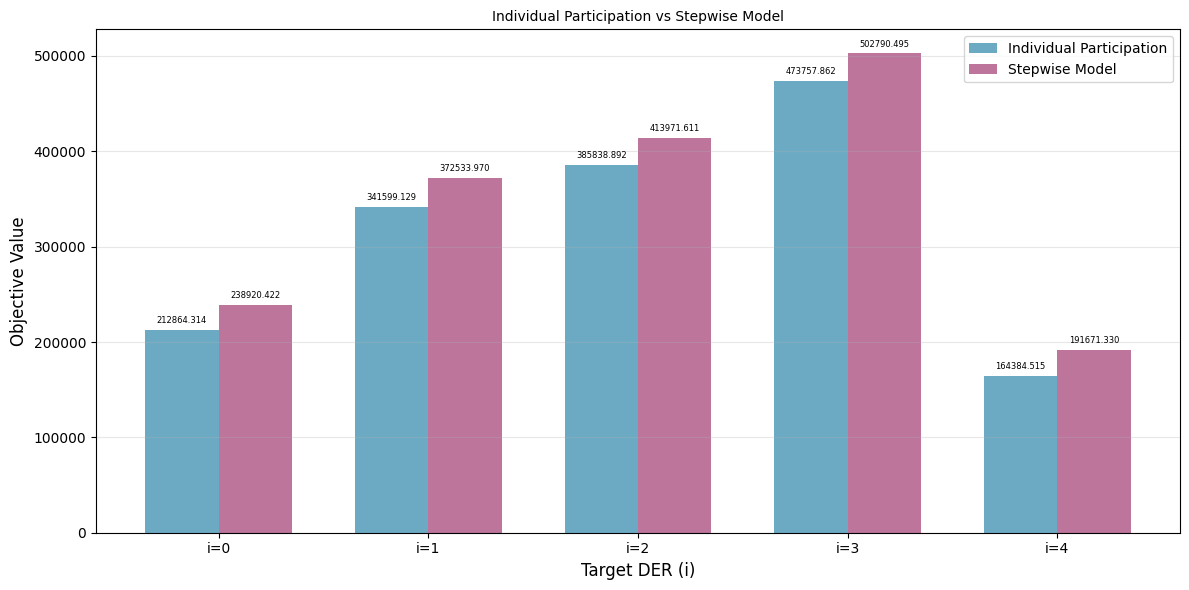

In [15]:
for target_i in range(I):
    print(f"=== Individual Participation vs Stepwise Model ÎπÑÍµê (target_i={target_i}) ===")
    print(f"{'t':>2} | {'x_ind':>8} {'x_step':>8} || {'yp_ind':>8} {'yp_step':>8} {'dp_step':>8} || {'ym_ind':>8} {'ym_step':>8} {'dm_step':>8}")
    print("-" * 80)

    for t in range(T):
        x_ind_avg = np.mean(x_ind[target_i][t])
        yp_ind_avg = np.mean(yp_ind[target_i][t, :])
        ym_ind_avg = np.mean(ym_ind[target_i][t, :])
        
        x_step = x_part[target_i][t]
        yp_step = np.mean(yp_part[target_i][t, :])
        ym_step = np.mean(ym_part[target_i][t, :])
        dp_step = np.mean(dp_part[target_i][t, :])
        dm_step = np.mean(dm_part[target_i][t, :])
        
        print(f"{t:>2} | {x_ind_avg:>8.3f} {x_step:>8.3f} || {yp_ind_avg:>8.3f} {yp_step:>8.3f} {dp_step:>8.3f} || {ym_ind_avg:>8.3f} {ym_step:>8.3f} {dm_step:>8.3f}")

    print(f"\n=== Objective Value ÎπÑÍµê ===")
    print(f"Individual Participation: {obj_ind[target_i]:.3f}")
    print(f"Stepwise Model: {obj_part[target_i]:.3f}")

fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(I)
width = 0.35

ind_values = [obj_ind[i] for i in range(I)]
step_values = [obj_part[i] for i in range(I)]

bars1 = ax.bar(x_pos - width/2, ind_values, width, label='Individual Participation', color='#2E86AB', alpha=0.7)
bars2 = ax.bar(x_pos + width/2, step_values, width, label='Stepwise Model', color='#A23B72', alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(max(ind_values), max(step_values))*0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=6)

ax.set_xlabel('Target DER (i)', fontsize=12)
ax.set_ylabel('Objective Value', fontsize=12)
ax.set_title('Individual Participation vs Stepwise Model', fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels([f'i={i}' for i in range(I)])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()